In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
cities

['atuona',
 'sao joao da barra',
 'linchuan',
 'luban',
 'toliary',
 'kavieng',
 'puerto ayora',
 'clyde river',
 'jacareacanga',
 'ushuaia',
 'sovetskiy',
 'punta arenas',
 'sungurlu',
 'busselton',
 'khatanga',
 'albany',
 'roebourne',
 'margate',
 'neiafu',
 'mackenzie',
 'te anau',
 'palmer',
 'thompson',
 'lagos',
 'rikitea',
 'dikson',
 'west bay',
 'jamestown',
 'lebu',
 'hermanus',
 'katsuura',
 'cherskiy',
 'mar del plata',
 'whitewater',
 'kollam',
 'troy',
 'butaritari',
 'nongstoin',
 'gari',
 'castro',
 'bluff',
 'kineta',
 'saleaula',
 'petrozavodsk',
 'provideniya',
 'farmington',
 'hithadhoo',
 'coquimbo',
 'pochutla',
 'rantepao',
 'vaini',
 'waddan',
 'sobolevo',
 'barrow',
 'lovozero',
 'phangnga',
 'aubiere',
 'mataura',
 'samusu',
 'new norfolk',
 'ambon',
 'morges',
 'souillac',
 'brae',
 'gurskoye',
 'coihaique',
 'verkhnetulomskiy',
 'college',
 'havoysund',
 'mitsamiouli',
 'pisco',
 'qaanaaq',
 'ilulissat',
 'constitucion',
 'saskylakh',
 'esperance',
 'cabo s

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | sao joao da barra
Processing Record 3 of Set 1 | linchuan
City not found. Skipping...
Processing Record 4 of Set 1 | luban
Processing Record 5 of Set 1 | toliary
City not found. Skipping...
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | jacareacanga
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | sovetskiy
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | sungurlu
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | roebourne
Processing Record 18 of Set 1 | margate
Processing Record 19 of Set 1 | neiafu
Processing Record 20 of Set 1 | mackenzie
Processing Record 21 of Set 1 | te anau
Processing Record 22 of Set 1 | palmer
Processing Record 23 of Set 1 | thompso

Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | shingu
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 4 | bongor
Processing Record 49 of Set 4 | luena
Processing Record 50 of Set 4 | talnakh
Processing Record 1 of Set 5 | san nicolas
Processing Record 2 of Set 5 | veseloyarsk
Processing Record 3 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 4 of Set 5 | la esperanza
Processing Record 5 of Set 5 | lima
Processing Record 6 of Set 5 | san cristobal
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | victoria
Processing Record 9 of Set 5 | bonavista
Processing Record 10 of Set 5 | zeya
Processing Record 11 of Set 5 | upington
Processing Record 12 of Set 5 | whitianga
Processing Record 13 of Set 5 | grand river south east
City not found. Skipping...
P

Processing Record 31 of Set 8 | jaisalmer
Processing Record 32 of Set 8 | bilma
Processing Record 33 of Set 8 | kungurtug
Processing Record 34 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 35 of Set 8 | ust-nera
Processing Record 36 of Set 8 | saint-georges
Processing Record 37 of Set 8 | mackay
Processing Record 38 of Set 8 | saravan
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | gornopravdinsk
Processing Record 41 of Set 8 | libreville
Processing Record 42 of Set 8 | gigmoto
Processing Record 43 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 44 of Set 8 | pevek
Processing Record 45 of Set 8 | aasiaat
Processing Record 46 of Set 8 | kyra
Processing Record 47 of Set 8 | fairbanks
Processing Record 48 of Set 8 | kawalu
Processing Record 49 of Set 8 | asau
Processing Record 50 of Set 8 | svetlaya
Processing Record 1 of Set 9 | veraval
Processing Record 2 of Set 9 | flinders
Processing Record 3 of Set 9 | codo
Proce

Processing Record 21 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 22 of Set 12 | jiazi
Processing Record 23 of Set 12 | ayagoz
Processing Record 24 of Set 12 | maryborough
Processing Record 25 of Set 12 | vestmannaeyjar
Processing Record 26 of Set 12 | presidente olegario
Processing Record 27 of Set 12 | qaqortoq
Processing Record 28 of Set 12 | moose factory
Processing Record 29 of Set 12 | honiara
Processing Record 30 of Set 12 | wahiawa
Processing Record 31 of Set 12 | ondjiva
Processing Record 32 of Set 12 | abay
Processing Record 33 of Set 12 | pozo colorado
Processing Record 34 of Set 12 | sunrise manor
Processing Record 35 of Set 12 | duz
City not found. Skipping...
Processing Record 36 of Set 12 | grand centre
City not found. Skipping...
Processing Record 37 of Set 12 | esso
Processing Record 38 of Set 12 | saint paul
Processing Record 39 of Set 12 | drayton valley
Processing Record 40 of Set 12 | visby
Processing Record 41 of Set 12 | keti bandar
Proces

In [13]:
city_data

[{'City': 'Atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 77.7,
  'Humidity': 67,
  'Cloudiness': 56,
  'Wind Speed': 9.13,
  'Country': 'PF',
  'Date': '2021-08-04 23:06:10'},
 {'City': 'Sao Joao Da Barra',
  'Lat': -21.6403,
  'Lng': -41.0511,
  'Max Temp': 65.84,
  'Humidity': 80,
  'Cloudiness': 46,
  'Wind Speed': 11.16,
  'Country': 'BR',
  'Date': '2021-08-04 23:05:08'},
 {'City': 'Luban',
  'Lat': 51.1201,
  'Lng': 15.2877,
  'Max Temp': 63,
  'Humidity': 86,
  'Cloudiness': 100,
  'Wind Speed': 2.59,
  'Country': 'PL',
  'Date': '2021-08-04 23:06:10'},
 {'City': 'Kavieng',
  'Lat': -2.5744,
  'Lng': 150.7967,
  'Max Temp': 83.16,
  'Humidity': 71,
  'Cloudiness': 13,
  'Wind Speed': 3.15,
  'Country': 'PG',
  'Date': '2021-08-04 23:05:50'},
 {'City': 'Puerto Ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 72.55,
  'Humidity': 82,
  'Cloudiness': 16,
  'Wind Speed': 7,
  'Country': 'EC',
  'Date': '2021-08-04 23:04:07'},
 {'City': 'Clyde River',
  'Lat': 7

In [14]:
len(city_data)

568

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.70,67,56,9.13,PF,2021-08-04 23:06:10
1,Sao Joao Da Barra,-21.6403,-41.0511,65.84,80,46,11.16,BR,2021-08-04 23:05:08
2,Luban,51.1201,15.2877,63.00,86,100,2.59,PL,2021-08-04 23:06:10
3,Kavieng,-2.5744,150.7967,83.16,71,13,3.15,PG,2021-08-04 23:05:50
4,Puerto Ayora,-0.7393,-90.3518,72.55,82,16,7.00,EC,2021-08-04 23:04:07
5,Clyde River,70.4692,-68.5914,35.76,94,100,9.10,CA,2021-08-04 23:04:49
6,Jacareacanga,-6.2222,-57.7528,81.46,34,3,1.19,BR,2021-08-04 23:06:11
7,Ushuaia,-54.8000,-68.3000,51.46,54,40,10.36,AR,2021-08-04 23:06:11
8,Sovetskiy,61.3614,63.5842,61.54,86,53,5.46,RU,2021-08-04 23:06:11
9,Punta Arenas,-53.1500,-70.9167,51.12,66,0,19.57,CL,2021-08-04 23:06:12


In [19]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-08-04 23:06:10,-9.8000,-139.0333,77.70,67,56,9.13
1,Sao Joao Da Barra,BR,2021-08-04 23:05:08,-21.6403,-41.0511,65.84,80,46,11.16
2,Luban,PL,2021-08-04 23:06:10,51.1201,15.2877,63.00,86,100,2.59
3,Kavieng,PG,2021-08-04 23:05:50,-2.5744,150.7967,83.16,71,13,3.15
4,Puerto Ayora,EC,2021-08-04 23:04:07,-0.7393,-90.3518,72.55,82,16,7.00
...,...,...,...,...,...,...,...,...,...
563,Santo Angelo,BR,2021-08-04 23:08:52,-28.2992,-54.2631,54.72,79,100,6.49
564,Batagay,RU,2021-08-04 23:08:53,67.6333,134.6333,58.42,39,51,5.28
565,Taksimo,RU,2021-08-04 23:08:53,56.3444,114.8794,61.09,69,39,0.92
566,Fredericton,CA,2021-08-04 23:08:20,45.9454,-66.6656,68.77,76,99,6.46


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

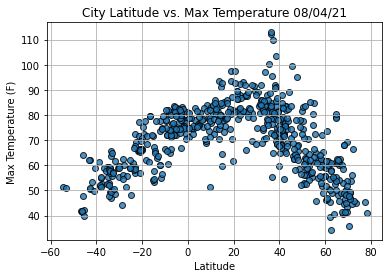

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Temp.png")

# Show plot.
plt.show()

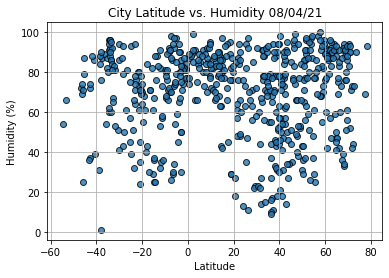

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_vs_Humidity.png")
# Show plot.
plt.show()

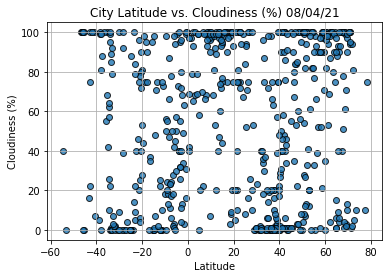

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_vs_Cloudiness.png")
# Show plot.
plt.show()

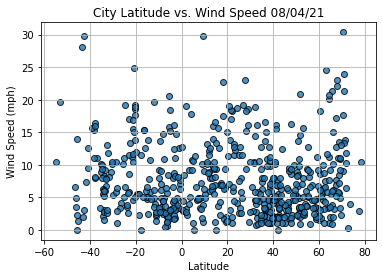

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_vs_Wind.png")
# Show plot.
plt.show()

In [66]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-08-04 23:04:18
Lat                       42.6001
Lng                      -73.9662
Max Temp                    76.17
Humidity                       62
Cloudiness                    100
Wind Speed                   2.35
Name: 13, dtype: object

In [43]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
563    False
564     True
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

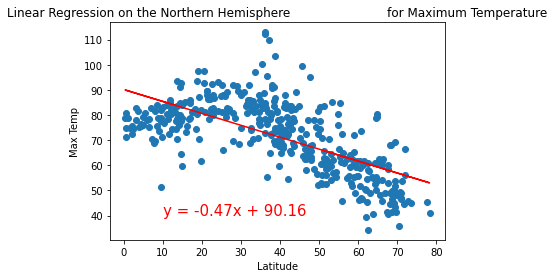

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

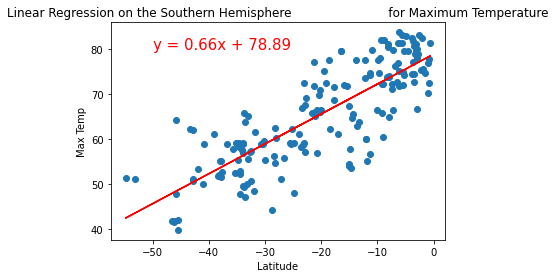

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

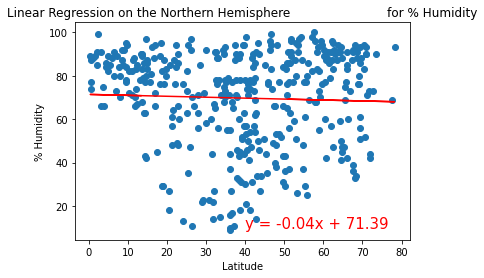

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

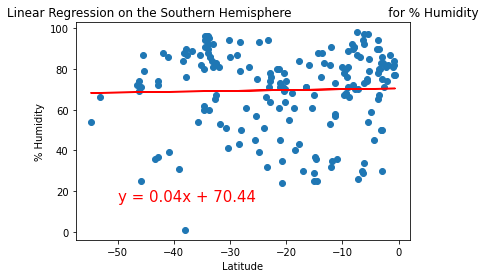

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

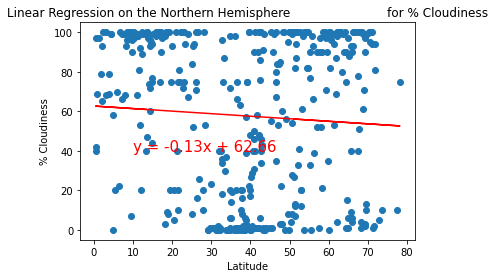

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

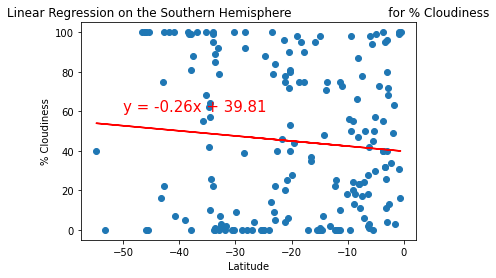

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

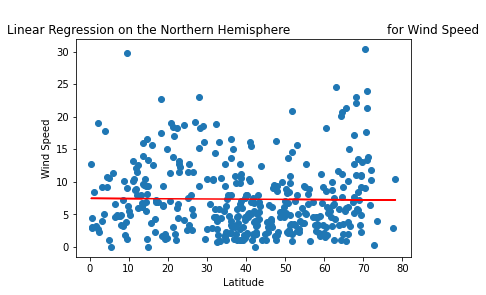

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

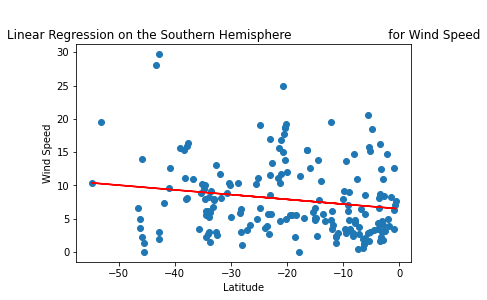

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))